In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import netCDF4 as nc
from netCDF4 import Dataset
import pyproj
import pandas as pd

In [24]:
#importing coral reef data

gml_file_coral_reefs = "/Users/maikentomren/Documents/prosjektoppgave/plotting_first_tries/KystOgFiskeri_50_Trondelag_25832_Korallrev_GML.gml"
gdf_coral_reefs = gpd.read_file(gml_file_coral_reefs)
coral_data = gdf_coral_reefs[gdf_coral_reefs['naturtypeNavn'] == 'Korallforekomster']
coral_df = pd.DataFrame(coral_data)





                                   gml_id  \
0  idcc1ddf21-7f6f-42ae-9de0-c1beae782900   
1  ide9bd1ddb-8384-48c4-a649-ba9597853be3   
2  id8cddeeb9-2353-4795-9161-4e01397a3a21   
3  idaa31e030-a287-4319-8dfc-183c2a169279   
4  id98f7a0c4-4c26-4288-a04d-0434cf8221c6   

                                lokalId  \
0  d8ba3d54-6e03-42dd-b77a-32b929c5db0f   
1  99f8ae65-8129-4d2f-a2e0-f6cdf8e08035   
2  4745cb87-fe72-4616-ac28-addecc91dfae   
3  ecaa4561-58ea-48ea-80d3-04f843dd7a46   
4  0a7f0f6c-01f2-494d-802d-3505caddf8f6   

                                            navnerom    verifiseringsdato  \
0  https://data.geonorge.no/sosi/biomangfold/kora...  2013-11-10T23:00:00   
1  https://data.geonorge.no/sosi/biomangfold/kora...  2011-01-16T23:00:00   
2  https://data.geonorge.no/sosi/biomangfold/kora...  2018-03-12T23:00:00   
3  https://data.geonorge.no/sosi/biomangfold/kora...  2018-03-12T23:00:00   
4  https://data.geonorge.no/sosi/biomangfold/kora...  2018-03-12T23:00:00   

     pr

In [81]:
#Making df's for variables in the coral reef data set. Not making df's for variables that only have equal values, that is:
#1: navnerom - all https://data.geonorge.no/sosi/biomangfold/kora...
#2: produkt - all "Korallrev"
#3: versjon - all 20240817
#4: målemetode - all "Spesielle metoder"
#5: medium - all "påSjøbunnen"
#6: naturtype - all "I09"
#7: naturtypeNavn - all "Korallforekomster"

coral_location_df = coral_df[['lengdegrad', 'breddegrad']]

coral_id_df = coral_df[['gml_id', 'lokalId']]

coral_verification_date_df = coral_df[['verifiseringsdato']]

coral_accuracy_df = coral_df[['nøyaktighet']]

coral_origin_df = coral_df[['opphav']]

coral_depth_df = coral_df[['minimumsdybde', 'maksimumsdybde']]

coral_source_name_df = coral_df[['kildeNavn']]

coral_observation_method_df = coral_df[['observasjonsMetode']]

coral_observation_location_df = coral_df[['observasjonsSted']]

coral_observation_ending_df = coral_df[['observasjonsSlutt']]

coral_geometry_df = coral_df[['geometry']]



""""
coral_variable_df = coral_df[['geometry']]
print(coral_variable_df.head())

all_equal = (coral_variable_df == coral_variable_df.iloc[0, 0]).all().all()

if all_equal:
    print("All equal")
else:
    print("not all equal")
"""


'"\ncoral_variable_df = coral_df[[\'geometry\']]\nprint(coral_variable_df.head())\n\nall_equal = (coral_variable_df == coral_variable_df.iloc[0, 0]).all().all()\n\nif all_equal:\n    print("All equal")\nelse:\n    print("not all equal")\n'

In [85]:
coral_location_df.describe()

,lengdegrad,breddegrad
count,104.000000,104.000000
mean,9.555119,63.893455
std,0.949038,0.399334
min,7.847970,63.413300
25%,9.111463,63.599578
50%,9.747610,63.762500
75%,10.473000,64.123475
max,11.320010,65.008160


In [86]:
coral_accuracy_df.describe()

,nøyaktighet
count,104.000000
mean,201.730769
std,228.364563
min,10.000000
25%,10.000000
50%,50.000000
75%,500.000000
max,500.000000


In [90]:
coral_depth_df.describe()

,minimumsdybde,maksimumsdybde
count,104.000000,104.000000
mean,37.500000,39.990385
std,94.784272,100.482766
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,363.000000,366.000000


/var/folders/lp/b8gl_n2n147_vxm1c97d933m0000gn/T/ipykernel_68633/2449126059.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([coral_depth_df['minimumsdybde'], coral_depth_df['maksimumsdybde']], labels=['Min Depth', 'Max Depth'])


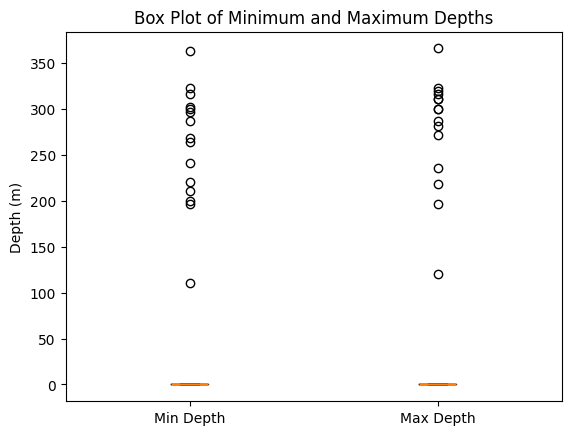

In [97]:
#Creating a box plot for max and min depth
plt.boxplot([coral_depth_df['minimumsdybde'], coral_depth_df['maksimumsdybde']], labels=['Min Depth', 'Max Depth'])
plt.title('Box Plot of Minimum and Maximum Depths')
plt.ylabel('Depth (m)')
plt.show()

/var/folders/lp/b8gl_n2n147_vxm1c97d933m0000gn/T/ipykernel_68633/3700998207.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([coral_depth_mean_replacement['minimumsdybde'], coral_depth_mean_replacement['maksimumsdybde']], labels=['Min Depth', 'Max Depth'])


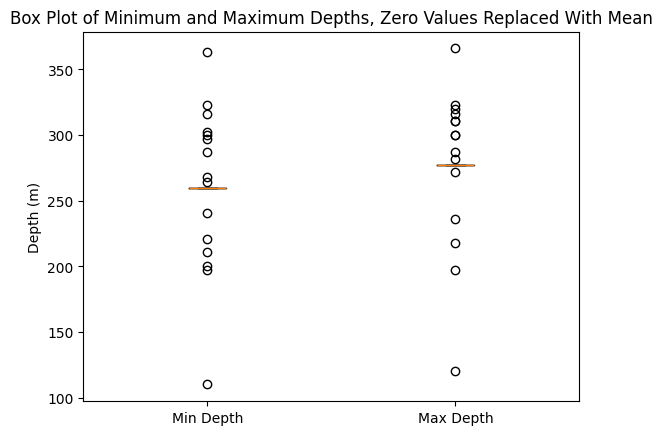

In [99]:
#Creating a box plot for max and min depth with zero values replaced with mean

mean_min_depth = coral_depth_df['minimumsdybde'][coral_depth_df['minimumsdybde'] != 0].mean()
mean_max_depth = coral_depth_df['maksimumsdybde'][coral_depth_df['maksimumsdybde'] != 0].mean()

coral_depth_mean_replacement = coral_depth_df.copy()

coral_depth_mean_replacement['minimumsdybde'] = coral_depth_mean_replacement['minimumsdybde'].replace(0, mean_min_depth)
coral_depth_mean_replacement['maksimumsdybde'] = coral_depth_mean_replacement['maksimumsdybde'].replace(0, mean_max_depth)

plt.boxplot([coral_depth_mean_replacement['minimumsdybde'], coral_depth_mean_replacement['maksimumsdybde']], labels=['Min Depth', 'Max Depth'])
plt.title('Box Plot of Minimum and Maximum Depths, Zero Values Replaced With Mean')
plt.ylabel('Depth (m)')
plt.show()


/var/folders/lp/b8gl_n2n147_vxm1c97d933m0000gn/T/ipykernel_68633/592619433.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([coral_depth_zeros_removed['minimumsdybde'], coral_depth_zeros_removed['maksimumsdybde']], labels=['Min Depth', 'Max Depth'])


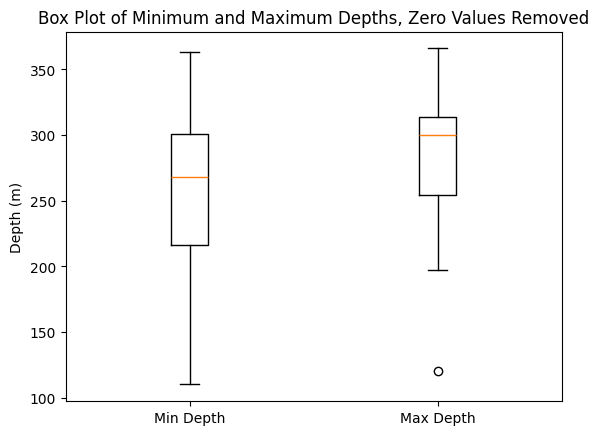

In [102]:
#Creating a box plot for max and min depth with zero values removed

coral_depth_zeros_removed = coral_depth_df[(coral_depth_df['minimumsdybde'] != 0) & (coral_depth_df['maksimumsdybde'] != 0)]

plt.boxplot([coral_depth_zeros_removed['minimumsdybde'], coral_depth_zeros_removed['maksimumsdybde']], labels=['Min Depth', 'Max Depth'])
plt.title('Box Plot of Minimum and Maximum Depths, Zero Values Removed')
plt.ylabel('Depth (m)')
plt.show()


